## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2020.

# ECBM E4040 - Assignment 2- Task 5: Kaggle Open-ended Competition

Kaggle is a platform for predictive modelling and analytics competitions in which companies and researchers post data and statisticians and data miners compete to produce the best models for predicting and describing the data.

If you don't have a Kaggle account, feel free to join at [www.kaggle.com](https://www.kaggle.com). To let the CAs do the grading more conveniently, please __use Lionmail to join Kaggle__ and __use UNI as your username__.

The website for this competition is: https://www.kaggle.com/c/ecbm-e4040fall2020-assignment-2-task-5.

You can find detailed description about this in-class competition on the website above. Please read carefully and follow the instructions.

<span style="color:red">__TODO__:</span>
1. Train a custom model for the bottle dataset classification problem. You are free to use any methods taught in the class or found by yourself on the Internet (ALWAYS provide reference to the source).
General training methods include:
    * Dropout
    * Batch normalization
    * Early stopping
    * l1-norm & l2-norm penalization
2. You'll be given the test set to generate your predictions (70% public + 30% private, but you don't know which ones are public/private). Achieve 70% accuracy on the public test set. The accuracy will be shown on the public leaderboard once you submit your prediction .csv file. The private leaderboard would be released after the competition. The final ranking would based on that result, not the public one.
3. 

    * Report your results on the Kaggle, for comparison with other students' optimal results (you can do this several times). 
    * Save your best model, using Github Classroom, at the same time when you submit the homework files into Courseworks. See instructions below. 

__Hint__: You can start from what you implemented in task 4. Another classic classification model named 'VGG16' can also be easily implemented. Students are allowed to use pretrained networks, and utilize transfer learning. 

## HW Submission Details:
There are three components to reporting the results of this task: 

**(A) Submission (up to 20 submissions each day) of the .csv prediction file throught the Kaggle platform;**. You should start doing this __VERY early__, so that students can compare their work as they are making progress with model optimization.

**(B) Editing and submitting the content of this Jupyter notebook, through Courseworks; **
(i) The code for your CNN model and for the training function. The code should be stored in __./ecbm4040/neuralnets/kaggle.py__;
(ii) Print out your training process and accuracy __within this notebook__;

**(C) Submitting your best CNN model through Github Classroom repo.**

**Description of (C):** 
For this task, we will continue to use Github classroom to save your model for submission. 

<span style="color:red">__Submission content:__ :</span>
(i) In your Assignment 2 submission folder, create a subfolder called __KaggleModel__. Upload your best model with all the data output (for example, __MODEL.data-00000-of-00001, MODEL.meta, MODEL.index__) into the folder. 
(ii) Remember to delete any intermediate results, **we only want your best model. Do not upload any data files**. The instructors will rerun the uploaded best model and verify against the score which you reported on the Kaggle.



## Load Data

In [ ]:
#Basic Info
#Training: 15000 images (3000 for each class). The labels are indicated by their sub-folders in the data zip file.
#Testing: 3500 images (700 for each class). The labels are held by the CAs.

# There has 5 degrees of the liquid amount (this is what you need to classify):
# 0%(labeled as 0)
# 25%(labeled as 1)
# 50%(labeled as 2)
# 75%(labeled as 3)
# 100%(labeled as 4)

In [1]:
path = '/home/ht2459/assignment2/e4040-2020fall-assign2-ht2459-main/data/kaggle-fall2020/'

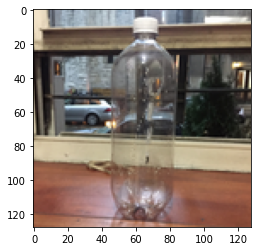

In [2]:
#show an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(path + 'kaggle_train_128/train_128/0/00000.png')
imgplot = plt.imshow(img)
plt.show()

In [3]:
#load data
import numpy as np
X_train = np.zeros([15000, 128,128,3])
y_train = np.zeros(15000)

for i in range(5):
    for j in range(3000):
        X_train[i*3000 + j,:,:,:] = mpimg.imread(path + f'kaggle_train_128/train_128/{i}/{str(i*3000+j).zfill(5)}.png')
        y_train[i*3000 + j] = i

In [ ]:
# import pickle
# with open('train_data', "wb") as output_file:
#     pickle.dump((X_train, y_train), output_file, protocol=4)

In [4]:
X_test = np.zeros([3500,128,128,3])
y_test = np.zeros(3500)

for i in range(3500):
    X_test[i,:,:,:]=mpimg.imread(path + f'kaggle_test_128/test_128/{str(i).zfill(5)}.png')
    
print('X_test: ',X_test.shape)

X_test:  (3500, 128, 128, 3)


In [ ]:
# with open('test_data', "wb") as output_file:
#     pickle.dump((X_test), output_file, protocol=4)

In [5]:
num_train,height,weight,channels = X_train.shape
index = np.random.choice(num_train,num_train,replace=False)

X_train = X_train[index]
y_train = y_train[index]

num_val = int(num_train*0.15)

X_val = X_train[:num_val]
y_val = y_train[:num_val]

X_train = X_train[num_val:]
y_train = y_train[num_val:]

In [6]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_val: ',X_val.shape)
print('y_val:',y_val.shape)

X_train:  (12750, 128, 128, 3)
y_train:  (12750,)
X_val:  (2250, 128, 128, 3)
y_val: (2250,)


## Build and Train Your Model Here

In [8]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [9]:
from utils.neuralnets.kaggle import model_builder

model = model_builder()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/50
399/399 [==============================] - 32s 81ms/step - loss: 1.0346 - accuracy: 0.5785 - val_loss: 0.6487 - val_accuracy: 0.7711
Epoch 2/50
399/399 [==============================] - 32s 79ms/step - loss: 0.5975 - accuracy: 0.7863 - val_loss: 0.4249 - val_accuracy: 0.8569
Epoch 3/50
399/399 [==============================] - 31s 79ms/step - loss: 0.4632 - accuracy: 0.8406 - val_loss: 0.4409 - val_accuracy: 0.8409
Epoch 4/50
399/399 [==============================] - 31s 79ms/step - loss: 0.3882 - accuracy: 0.8641 - val_loss: 0.3150 - val_accuracy: 0.8964
Epoch 5/50
399/399 [==============================] - 31s 79ms/step - loss: 0.3349 - accuracy: 0.8842 - val_loss: 0.3030 - val_accuracy: 0.9053
Epoch 6/50
399/399 [==============================] - 31s 79ms/step - loss: 0.3049 - accuracy: 0.8956 - val_loss: 0.2540 - val_accuracy: 0.9200
Epoch 7/50
399/399 [==============================] - 31s 79ms/step - loss: 0.2827 - accuracy: 0.9027 - val_loss: 0.2574 - val_accuracy:

In [10]:
predictions = model.predict(X_test)

## Save your best model

In [11]:
model.save('mymodel.h5') 

## Generate .csv file for Kaggle

In [12]:
# The following code snippet can be used to generate your prediction .csv file.

import csv
with open('predicted.csv','w') as csvfile:
    fieldnames = ['Id','label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index,l in enumerate(predictions.argmax(axis=1)):
        filename = '{:05d}'.format(index)+'.png'
        label = str(l)
        writer.writerow({'Id': filename, 'label': label})